<a href="https://colab.research.google.com/github/sanjeev29/EVA-4/blob/master/S12/PartA/s12_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks


In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from models.utils.tiny_imagenet_loader import check_cuda, get_id_dictionary, get_train_test_data, get_data_loader

check_cuda()

test_split = 0.3
train_data, train_labels, test_data, test_labels = get_train_test_data(get_id_dictionary(), test_split)

trainloader, testloader = get_data_loader(train_data, train_labels, test_data, test_labels)

CUDA Available? True
Finished loading data in 0.10375618934631348 seconds.


In [0]:
from models.resnet import ResNet18

In [16]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = ResNet18().to(device)
summary(net, input_size=(3, 64, 64))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14      

In [0]:
import torch.nn as nn
import torch.optim as optim

from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)

In [0]:
from models.utils import train
from models.utils import test

In [9]:
epochs = 50
last_epoch = False

train_losses = []
train_acc = []
test_acc = []
test_losses = []

for epoch in range(epochs):
  train.train(net, device, trainloader, optimizer, criterion, epoch, train_acc, train_losses)
  if epoch == epochs - 1:
    last_epoch = True
  test.test(net, device, testloader, criterion, last_epoch, test_acc, test_losses)
  scheduler.step()

Epoch= 0 Loss=3.822248697280884 Batch_id=1203 Accuracy=7.25: 100%|██████████| 1204/1204 [11:17<00:00,  1.78it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0623, Accuracy: 4266/33000 (12.93%)



Epoch= 1 Loss=3.599381446838379 Batch_id=1203 Accuracy=16.90: 100%|██████████| 1204/1204 [11:16<00:00,  1.78it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0559, Accuracy: 6407/33000 (19.42%)



Epoch= 2 Loss=3.0005648136138916 Batch_id=1203 Accuracy=23.40: 100%|██████████| 1204/1204 [11:18<00:00,  1.77it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0527, Accuracy: 7892/33000 (23.92%)



Epoch= 3 Loss=3.9535200595855713 Batch_id=1203 Accuracy=28.87: 100%|██████████| 1204/1204 [11:19<00:00,  1.77it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0464, Accuracy: 10220/33000 (30.97%)



Epoch= 4 Loss=1.7930607795715332 Batch_id=1203 Accuracy=33.21: 100%|██████████| 1204/1204 [11:13<00:00,  1.79it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0441, Accuracy: 11082/33000 (33.58%)



Epoch= 5 Loss=2.7868969440460205 Batch_id=1203 Accuracy=36.99: 100%|██████████| 1204/1204 [11:10<00:00,  1.79it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0431, Accuracy: 11655/33000 (35.32%)



Epoch= 6 Loss=3.4959964752197266 Batch_id=1203 Accuracy=43.50: 100%|██████████| 1204/1204 [11:14<00:00,  1.79it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0372, Accuracy: 14085/33000 (42.68%)



Epoch= 7 Loss=2.88293719291687 Batch_id=1203 Accuracy=45.71: 100%|██████████| 1204/1204 [11:08<00:00,  1.80it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0361, Accuracy: 14528/33000 (44.02%)



Epoch= 8 Loss=2.585599422454834 Batch_id=1203 Accuracy=47.40: 100%|██████████| 1204/1204 [11:07<00:00,  1.80it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0359, Accuracy: 14676/33000 (44.47%)



Epoch= 9 Loss=2.904338836669922 Batch_id=1203 Accuracy=48.84: 100%|██████████| 1204/1204 [11:10<00:00,  1.80it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0344, Accuracy: 15291/33000 (46.34%)



Epoch= 10 Loss=1.7445697784423828 Batch_id=1203 Accuracy=50.41: 100%|██████████| 1204/1204 [11:13<00:00,  1.79it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0340, Accuracy: 15510/33000 (47.00%)



Epoch= 11 Loss=4.5259318351745605 Batch_id=1203 Accuracy=52.13: 100%|██████████| 1204/1204 [11:10<00:00,  1.80it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0343, Accuracy: 15585/33000 (47.23%)



Epoch= 12 Loss=1.7458250522613525 Batch_id=1203 Accuracy=57.21: 100%|██████████| 1204/1204 [11:10<00:00,  1.79it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0312, Accuracy: 16923/33000 (51.28%)



Epoch= 13 Loss=1.9337791204452515 Batch_id=1203 Accuracy=58.70: 100%|██████████| 1204/1204 [11:08<00:00,  1.80it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0311, Accuracy: 17021/33000 (51.58%)



Epoch= 14 Loss=2.0558040142059326 Batch_id=1203 Accuracy=59.63: 100%|██████████| 1204/1204 [11:06<00:00,  1.81it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0306, Accuracy: 17261/33000 (52.31%)



Epoch= 15 Loss=2.517815589904785 Batch_id=1203 Accuracy=60.37: 100%|██████████| 1204/1204 [11:06<00:00,  1.81it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0308, Accuracy: 17303/33000 (52.43%)



Epoch= 16 Loss=2.673092842102051 Batch_id=1203 Accuracy=61.84: 100%|██████████| 1204/1204 [11:03<00:00,  1.82it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0310, Accuracy: 17220/33000 (52.18%)



Epoch= 17 Loss=1.7810940742492676 Batch_id=1203 Accuracy=62.44: 100%|██████████| 1204/1204 [11:08<00:00,  1.80it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0310, Accuracy: 17273/33000 (52.34%)



Epoch= 18 Loss=1.8662004470825195 Batch_id=1203 Accuracy=66.95: 100%|██████████| 1204/1204 [11:07<00:00,  1.80it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0289, Accuracy: 18203/33000 (55.16%)



Epoch= 19 Loss=1.8845713138580322 Batch_id=1203 Accuracy=68.09: 100%|██████████| 1204/1204 [11:12<00:00,  1.79it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0292, Accuracy: 18134/33000 (54.95%)



Epoch= 20 Loss=1.2605667114257812 Batch_id=1203 Accuracy=68.81: 100%|██████████| 1204/1204 [11:11<00:00,  1.79it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0291, Accuracy: 18100/33000 (54.85%)



Epoch= 21 Loss=1.924821376800537 Batch_id=1203 Accuracy=69.67: 100%|██████████| 1204/1204 [11:15<00:00,  1.78it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0291, Accuracy: 18196/33000 (55.14%)



Epoch= 22 Loss=2.5904541015625 Batch_id=1203 Accuracy=70.35: 100%|██████████| 1204/1204 [11:14<00:00,  1.79it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0292, Accuracy: 18316/33000 (55.50%)



Epoch= 23 Loss=1.1647833585739136 Batch_id=1203 Accuracy=70.95: 100%|██████████| 1204/1204 [11:16<00:00,  1.78it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0295, Accuracy: 18153/33000 (55.01%)



Epoch= 24 Loss=1.1166940927505493 Batch_id=1203 Accuracy=74.18: 100%|██████████| 1204/1204 [11:18<00:00,  1.78it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0283, Accuracy: 18588/33000 (56.33%)



Epoch= 25 Loss=1.276197910308838 Batch_id=1203 Accuracy=75.02: 100%|██████████| 1204/1204 [11:17<00:00,  1.78it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0284, Accuracy: 18629/33000 (56.45%)



Epoch= 26 Loss=0.5672001838684082 Batch_id=1203 Accuracy=75.73: 100%|██████████| 1204/1204 [11:14<00:00,  1.79it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0285, Accuracy: 18608/33000 (56.39%)



Epoch= 27 Loss=1.4255411624908447 Batch_id=1203 Accuracy=76.17: 100%|██████████| 1204/1204 [11:15<00:00,  1.78it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Validation set: Average loss: 0.0286, Accuracy: 18572/33000 (56.28%)



Epoch= 28 Loss=0.8491869568824768 Batch_id=95 Accuracy=77.70:   8%|▊         | 95/1204 [00:53<10:08,  1.82it/s]

Buffered data was truncated after reaching the output size limit.

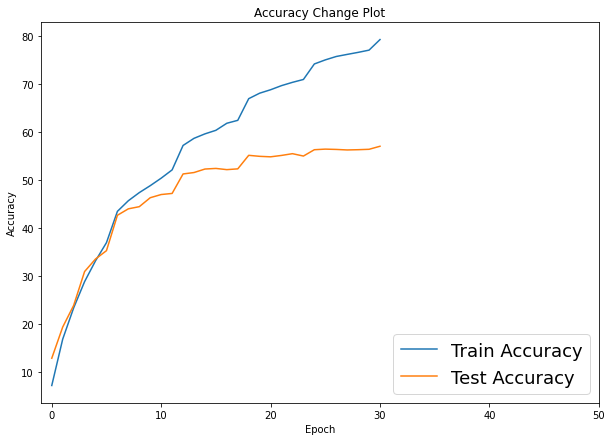

In [11]:
acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.set_xlim([-1, 50])
axs.plot(train_acc, label='Train Accuracy')
axs.plot(test_acc, label='Test Accuracy')
axs.set_title("Accuracy Change Plot")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
axs.legend(loc='lower right', prop={'size': 18})
acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/accuracy_change_plot.jpg')